<a href="https://colab.research.google.com/github/inesluparia/ML/blob/master/StrokeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score

In [12]:
!git clone https://github.com/inesluparia/ML.git

fatal: destination path 'ML' already exists and is not an empty directory.


In [13]:
data = pd.read_csv("ML/WillYouHaveAstroke/healthcare-dataset-stroke-data.csv")

In [14]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#data.shape
#data.isnull().sum()

In [16]:
data.dropna(inplace=True)

In [18]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [20]:
data = data.drop(['id'], axis=1)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [22]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [23]:
X = pd.get_dummies(X)
columnNames = list(X.columns)

In [ ]:
#print(y[:5])

In [26]:
#X.shape

(4909, 21)

In [27]:
print(X.iloc[0:5,:])

    age  hypertension  heart_disease  avg_glucose_level   bmi  gender_Female  \
0  67.0             0              1             228.69  36.6              0   
2  80.0             0              1             105.92  32.5              0   
3  49.0             0              0             171.23  34.4              1   
4  79.0             1              0             174.12  24.0              1   
5  81.0             0              0             186.21  29.0              0   

   gender_Male  gender_Other  ever_married_No  ever_married_Yes  ...  \
0            1             0                0                 1  ...   
2            1             0                0                 1  ...   
3            0             0                0                 1  ...   
4            0             0                0                 1  ...   
5            1             0                0                 1  ...   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0            

In [28]:
X = X.values
y = y.values

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 222 )

In [31]:
model = Sequential()
model.add(Dense(21, activation = 'relu'))
model.add(Dense(21, activation = 'relu'))
#not sure, try others also or just nothing!
model.add(Dense(1, activation = 'sigmoid'))

adam = Adam(learning_rate=0.001) 
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=50, batch_size=50, verbose=1)

Epoch 1/50
74/74 [==============================] - 1s 2ms/step - loss: 0.4428 - accuracy: 0.8416
Epoch 2/50
74/74 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9535
Epoch 3/50
74/74 [==============================] - 0s 2ms/step - loss: 0.1766 - accuracy: 0.9535
Epoch 4/50
74/74 [==============================] - 0s 2ms/step - loss: 0.1657 - accuracy: 0.9535
Epoch 5/50
74/74 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9535
Epoch 6/50
74/74 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9535
Epoch 7/50
74/74 [==============================] - 0s 2ms/step - loss: 0.1520 - accuracy: 0.9535
Epoch 8/50
74/74 [==============================] - 0s 2ms/step - loss: 0.1497 - accuracy: 0.9535
Epoch 9/50
74/74 [==============================] - 0s 2ms/step - loss: 0.1481 - accuracy: 0.9535
Epoch 10/50
74/74 [==============================] - 0s 2ms/step - loss: 0.1468 - accuracy: 0.9535
Epoch 11/50
74/74 [

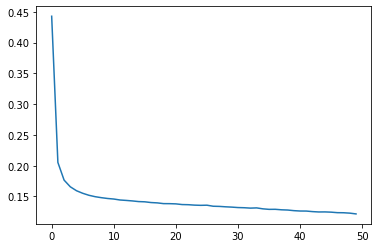

In [34]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)

In [35]:
model.evaluate(X_test,y_test,verbose=1) 

39/39 [==============================] - 0s 3ms/step - loss: 0.1291 - accuracy: 0.9691


[0.12912552058696747, 0.9690553545951843]

In [36]:
#Confusion matrix. Get details about each type of prediction
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # creates a new array with true/false based on the boolean test

cm = confusion_matrix(y_test, y_pred)
print(cm)

# will return a 2D array like this (random numbers):
#[[6432   326]
 #[ 481  1190]]

# interpretation:
# Top-left: 6432 correct predictions of 1. 
# Top-right: 326 incorrect predictions of 1, when the y_test was 0.
# Bottom-left: 481 incorrect predictions of 0, when the y_test was 1.
# Bottom-right: 1190 correct predictions of 0

[[1188    2]
 [  36    2]]


In [37]:
print(columnNames)

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


In [38]:
#Will I have a stroke?????
new_value = [[37, 0, 0, 120, 40, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0 ]] # enter new data in 2D array. Only numbers + dummy variables. 

new_value = scaler.transform(new_value) # Don't forget to scale!
print(new_value)
model.predict(new_value)

[[-0.26007277 -0.31806673 -0.22820795  0.33081745  1.41428573  0.8333736
  -0.83302272 -0.01427407 -0.72948428  0.72948428 -0.38370648 -0.067095
   0.86391759 -0.43297779 -0.39790627 -0.98563987  0.98563987 -0.65792577
   2.20567315 -0.77834613 -0.42030213]]


array([[0.01310781]], dtype=float32)